In [1]:
import tensorflow

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "2"

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14548021647890509262
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15862523495
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7696816988865278949
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 9a57:00:00.0, compute capability: 6.0"
]


In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from datetime import datetime
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Code of Autoencoder model

In [3]:
# """
# Created on Mon Apr 23 08:01:41 2018

# @author: Philipp
# """

# import pandas as pd
# import numpy as np
# import tensorflow as tf
# import os
# from datetime import datetime
# from sklearn.metrics import roc_auc_score as auc


# #%%
# '''Daten einlesen und in einem gemeinsamen DataFrame speichern'''
# data = pd.read_csv("C:/Users/Philipp Rohde/Desktop/masterthesis/rohdaten/arzta_daten_anonym1.csv",sep=';')
# data2 = pd.read_csv("C:/Users/Philipp Rohde/Desktop/masterthesis/rohdaten/arzta_daten_anonym2.csv",sep=';')
# data3 = pd.read_csv("C:/Users/Philipp Rohde/Desktop/masterthesis/rohdaten/arzta_daten_anonym3.csv",sep=';')
# data4 = pd.read_csv("C:/Users/Philipp Rohde/Desktop/masterthesis/rohdaten/arzta_daten_anonym4.csv",sep=';')
# frames = [data,data2,data3,data4]
# df = pd.concat(frames)
# print(df.shape)

# #%%
# #Daten one hot kodieren für Modell 1
# df = pd.read_csv("C:/Users/Philipp Rohde/Desktop/masterthesis/rohdaten/arzta_daten_anonym1.csv",sep=';')
# df1 = pd.get_dummies(df['NUMMER_KAT'])
# df = df.drop(['NUMMER_KAT'],axis=1)
# data = df.merge(df1,left_index=True,right_index=True)
# df2 = pd.get_dummies(df['NUMMER'])
# df = df.drop(['NUMMER'],axis=1)
# data = data.merge(df2,left_index=True,right_index=True)
# df3 = pd.get_dummies(df['LEISTUNG'])
# df = df.drop(['LEISTUNG'],axis=1)
# data = data.merge(df3,left_index=True,right_index=True)

# #%% Bag of Words

# unique = data.ID.value_counts(normalize=False).index.tolist()
# row_list = []
# row_list1 = []
# row_list2 = []
# row_list3 = []
# row_list4 = []
# row_list5 = []
# for i in unique:
#     unique1 = data[data['ID']==i]
#     df = unique1[['NUMMER','NUMMER_KAT','LEISTUNG']].astype(str)
#     neu = df.apply(lambda x: x.str.split(expand=True).stack()).stack().value_counts()
#     betr = unique1['RECHNUNGSBETRAG']
#     betr = betr[0:1]
#     betr = int(betr)
#     alt = unique1['ALTER']
#     alt = alt[1:2]
#     alt = int(alt)
#     gesch = unique1['GESCHLECHT']
#     gesch = gesch[2:3]
#     gesch = int(gesch)
#     fach = unique1['FACHRICHTUNG']
#     fach = fach[2:3]
#     fach = int(fach)
#     betrag = unique1['BETRAG']
#     betrag = betrag[12:13]
#     betrag = int(betrag)
#     row_list1.append(betr)
#     row_list2.append(alt)
#     row_list3.append(gesch)
#     row_list4.append(fach)
#     row_list5.append(betrag)
#     row_list.append(dict(neu))
# df3 = pd.DataFrame(row_list)
# df6 = pd.DataFrame(row_list1,columns=['RECHNUGSBETRAG'])
# df7 = pd.DataFrame(row_list2,columns=['ALTER'])
# df8 = pd.DataFrame(row_list3,columns=['GESCHLECHT'])
# df9 = pd.DataFrame(row_list5,columns=['BETRAG'])
# df10 = pd.DataFrame(row_list4,columns=['FACHRICHTUNG'])
# df4 = pd.DataFrame(unique,columns=['ID'])
# df5 = df4.merge(df6,left_index=True,right_index=True)
# df5 = df5.merge(df3,left_index=True,right_index=True)
# df5 = df5.merge(df7,left_index=True,right_index=True)
# df5 = df5.merge(df8,left_index=True,right_index=True)
# df5 = df5.merge(df9,left_index=True,right_index=True)
# df5 = df5.merge(df10,left_index=True,right_index=True)

# #%%
# #Aneinander hängen für Modell 2
# unique = data.ID.value_counts(normalize=False).index.tolist()
# leer = []
# for i in unique:
#     test1 = data[data['ID']==i]
#     for i in range(172):
#         i += 1
#         bez = 'NUMMER_KAT_' + str(i)
#         test1[bez] = np.nan
#         bez1 = 'NUMMER_' + str(i)
#         test1[bez1] = np.nan
#         bez2 = 'LEISTUNG_' + str(i)
#         test1[bez1] = np.nan
#     index = test1.index.values.astype(int)
#     for j in range(1,len(index)):
#         test2 = test1['NUMMER_KAT'][index[j]]
#         test1.iloc[0,14+j] = test2
#         test3 = test1['NUMMER'][index[j]]
#         test1.iloc[0,186+j] = test3
#         test4 = test1['LEISTUNG'][index[j]]
#         test1.iloc[0,358+j] = test3
#         k = index[j]
#         test1 = test1.drop(labels=k, axis = 0)
#     frames = [leer,test1,test2,test3]
#     leer = pd.concat(frames)

# #%%
# '''Spalte Betrug einfügen; 0-> kein Betrug, 1 -> Betrug'''
# df.loc [ df.KORREKTUR > 0 , 'Betrug' ] = 1
# df.loc [ df.KORREKTUR == 0 , 'Betrug' ] = 0
# df = df.drop(['KORREKTUR'],axis=1)
# df = df.drop(['ART'],axis=1)
# print("{:.3f} % sind Betrugsfälle ".format(np.sum(df['Betrug']) / df.shape[0] * 100))
# print(df.head())

# #%%
# '''Datensatz aufteilen, so dass in beiden der gleich Anteil Betrug vorkommt'''
# split = 0.25
# anteil_trainingssatz = int((1-split) *df.shape[0])
# train_x = df.iloc[:anteil_trainingssatz, 0:-1].values
# train_y = df.iloc[:anteil_trainingssatz, -1].values
# test_x = df.iloc[anteil_trainingssatz:, 0:-1].values
# test_y = df.iloc[anteil_trainingssatz:, -1].values

# print(train_x)
# print("Größe Trainingssatz {}, Anzahl Betrug: {}, Prozentualer Anteil Betrug {:.5f}".format(train_x.shape[0], np.sum(train_y), np.sum(train_y)/train_x.shape[0]))
# print("Größe Testsatz {}, Anzahl Betrug: {}, Prozentualer Anteil Betrug {:.5f}".format(test_x.shape[0], np.sum(test_y), np.sum(test_y)/test_y.shape[0]))

# #%%
# '''Normalisierung'''
# mean = []
# std = []
# for i in range(train_x.shape[1]):
#     mean.append(train_x[:,i].mean())
#     std.append(train_x[:,i].std())
#     train_x[:, i] = (train_x[:, i] - mean[-1]) / std[-1]
#     test_x[:, i] =  (test_x[:, i] - mean[-1]) / std[-1]

# #%%
# ausgabe_zaehler = 1

# '''Hyperparameter'''
# lernrate = 0.001
# epochen = 1000
# batch = 1024
# beta = 0.1
# momentum = 0.2
# #%%
# '''Knoten in versteckter Schicht'''
# n_hidden_1 = 15 #Knoten in erster Schicht
# n_hidden_2 = 10 #Knoten in zweiter Schicht
# n_hidden_3 = 5  #Knoten in dritter Schicht

# '''Inputschicht'''
# n_input = train_x.shape[1]

# #%%
# '''Platzhalter für Tensor'''
# X = tf.placeholder("float", [None, n_input])

# '''Gewichte - zufällig Standardnormal'''
# gewicht = {
#         'encoder_h1': tf.Variable(tf.random_normal([n_input , n_hidden_1])),
#         'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
#         'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1 , n_hidden_2])),
#         'decoder_h2': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
#         'encoder_h3': tf.Variable(tf.random_normal([n_hidden_2 , n_hidden_3])),
#         'decoder_h3': tf.Variable(tf.random_normal([n_hidden_3 , n_hidden_2]))
#         }

# '''Bias - zufällig Standardnormal'''
# bias = {
#         'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
#         'decoder_b1': tf.Variable(tf.random_normal([n_input])),
#         'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
#         'decoder_b2': tf.Variable(tf.random_normal([n_hidden_1])),
#         'encoder_b3': tf.Variable(tf.random_normal([n_hidden_3])),
#         'decoder_b3': tf.Variable(tf.random_normal([n_hidden_2]))
#         }

# #%%
# '''Encoder'''
# def encoder(x):
#     # erste Schicht
#     layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, gewicht['encoder_h1']), bias['encoder_b1']))
#     # dropout mit Rate pi
#     layer_1 = tf.layers.dropout(layer_1,rate=0.2)
#     # zweite Schicht
#     layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, gewicht['encoder_h2']), bias['encoder_b2']))
#     # dropout mit Rate pi
#     layer_2 = tf.layers.dropout(layer_2,rate=0.2)
#     # dritte Schicht
#     layer_3 = tf.nn.tanh(tf.add(tf.matmul(layer_2, gewicht['encoder_h3']), bias['encoder_b3']))
#     # dropout mit Rate pi
#     layer_3 = tf.layers.dropout(layer_3,rate=0.2)
#     return layer_3


# #%%
# '''Decoder'''
# def decoder(x):
#     # erste Schicht
#     layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, gewicht['decoder_h3']), bias['decoder_b3']))
#     # dropout mit Rate pi
#     layer_1 = tf.layers.dropout(layer_1,rate=0.2)
#     # zweite Schicht
#     layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, gewicht['decoder_h2']), bias['decoder_b2']))
#     # dropout mit Rate pi
#     layer_2 = tf.layers.dropout(layer_2,rate=0.2)
#     # dritte Schicht
#     layer_3 = tf.nn.tanh(tf.add(tf.matmul(layer_2, gewicht['decoder_h1']), bias['decoder_b1']))
#     # dropout mit Rate pi
#     layer_3 = tf.layers.dropout(layer_3,rate=0.2)
#     return layer_3

# #%%
# '''Autoencoder'''
# encoder_op = encoder(X)
# decoder_op = decoder(encoder_op)

# #%%
# '''Output Autoencoder'''
# y_pred = decoder_op

# #%%
# '''gewünschter Output = Input'''
# y_true = X

# #%%
# '''mittlerer quadratischer Fehler im batch'''
# batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)

# #%%
# '''Fehlerfunktion'''
# fehler = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

# '''Opitimierer'''
# #Standardotimierer
# optimierer = tf.train.RMSPropOptimizer(lernrate).minimize(fehler)

# #Momentumoptimierer
# #optimizer = tf.train.MomentumOptimizer(lernrate,momentum).minimize(fehler)

# '''Regularisierung'''
# #L2 Regularisierungsterm
# reg = tf.nn.l2_loss(gewicht['encoder_h1']) + tf.nn.l2_loss(gewicht['encoder_h2']) + tf.nn.l2_loss(gewicht['decoder_h1']) + tf.nn.l2_loss(gewicht['decoder_h2'])
# #reg = tf.nn.l2_loss(gewicht['encoder_h1']) + tf.nn.l2_loss(gewicht['encoder_h2']) + tf.nn.l2_loss(gewicht['decoder_h1']) + tf.nn.l2_loss(gewicht['decoder_h2']) + tf.nn.l2_loss(gewicht['decoder_h3']) + tf.nn.l2_loss(gewicht['decoder_h3'])

# #Fehlerfunktion mit L2 Regularisierung
# fehler = tf.reduce_mean(fehler + beta * reg)
# #%%
# '''Modell speichern'''
# pfad = '.'
# save_model = os.path.join(pfad, 'temp_modell.ckpt')
# saver = tf.train.Saver()

# #%%
# '''Variablen initialisieren'''
# init = tf.global_variables_initializer()

# '''Session starten'''
# with tf.Session() as sess:
#     now = datetime.now()
#     sess.run(init)
#     total_batch = int(train_x.shape[0]/batch)
#     #Trainingsepochen
#     for epoche in range(epochen):
#         #Schleife über alle batches
#         for i in range(total_batch):
#             #batch ziehen
#             batch_idx = np.random.choice(train_x.shape[0], batch)
#             batch_xs = train_x[batch_idx]
#             #optimieren
#             _, Fehler = sess.run([optimierer, fehler], feed_dict={X: batch_xs})
#         # Display logs per epoch step
#         if epoche % ausgabe_zaehler == 0:
#             train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
#             print("Epoche:", '%04d' % (epoche+1),
#                   "Fehler =", "{:.9f}".format(Fehler),
#                   "Trainings-AUC =", "{:.6f}".format(auc(train_y, train_batch_mse)),
#                   "Zeit =", "{}".format(datetime.now() - now))
#     save_path = saver.save(sess, save_model)
#     print("Fertig %s" % save_path)

# #%%
# '''Modell auf Testdatensatz testen'''
# save_model = os.path.join(pfad, 'temp_modell.ckpt')
# saver = tf.train.Saver()

# with tf.Session() as sess:
#     now = datetime.now()
#     saver.restore(sess, save_model)
#     test_batch_mse = sess.run(batch_mse, feed_dict={X: test_x})
#     print("Test-AUC: {:.6f}".format(auc(test_y, test_batch_mse)))


## Implementation by Tensorflow

In [2]:
tf.test.gpu_device_name()

NameError: name 'tf' is not defined

In [14]:
sess = tf.Session()

df = pd.read_pickle('../TransformedData.pkl')

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:100].drop(['ID', 'target'], axis=1), df.target, random_state=0)

scaler = StandardScaler()
train_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)
test_y = y_test
train_y = y_train

#%%
ausgabe_zaehler = 1

'''Hyperparameter'''
lernrate = 0.00001
epochen = 20
batch = 16000
beta = 0.1
momentum = 0.5
#%%
'''Knoten in versteckter Schicht'''
n_hidden_1 = 20 #Knoten in erster Schicht
n_hidden_2 = 10 #Knoten in zweiter Schicht
n_hidden_3 = 10  #Knoten in dritter Schicht
n_hidden_4 = 10
n_hidden_5 = 10

'''Inputschicht'''
n_input = train_x.shape[1]

tf.reset_default_graph()

with tf.device(tf.test.gpu_device_name()):
    '''Gewichte - zufällig Standardnormal'''
    gewicht = {
            'encoder_h1': tf.Variable(tf.random_normal([n_input , n_hidden_1])),
            'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
            'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1 , n_hidden_2])),
            'decoder_h2': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
            'encoder_h3': tf.Variable(tf.random_normal([n_hidden_2 , n_hidden_3])),
            'decoder_h3': tf.Variable(tf.random_normal([n_hidden_3 , n_hidden_2])),
        
            'encoder_h4': tf.Variable(tf.random_normal([n_hidden_3 , n_hidden_4])),
            'decoder_h4': tf.Variable(tf.random_normal([n_hidden_4 , n_hidden_3])),
            'encoder_h5': tf.Variable(tf.random_normal([n_hidden_4 , n_hidden_5])),
            'decoder_h5': tf.Variable(tf.random_normal([n_hidden_5 , n_hidden_4]))
            }

    '''Bias - zufällig Standardnormal'''
    bias = {
            'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
            'decoder_b1': tf.Variable(tf.random_normal([n_input])),
            'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
            'decoder_b2': tf.Variable(tf.random_normal([n_hidden_1])),
            'encoder_b3': tf.Variable(tf.random_normal([n_hidden_3])),
            'decoder_b3': tf.Variable(tf.random_normal([n_hidden_2])),
        
            'encoder_b4': tf.Variable(tf.random_normal([n_hidden_4])),
            'decoder_b4': tf.Variable(tf.random_normal([n_hidden_3])),
            'encoder_b5': tf.Variable(tf.random_normal([n_hidden_5])),
            'decoder_b5': tf.Variable(tf.random_normal([n_hidden_4]))
            }

    #%%
    '''Encoder'''
    def encoder(x):
        # erste Schicht
        layer_1 = tf.nn.relu(tf.add(tf.matmul(x, gewicht['encoder_h1']), bias['encoder_b1']))
        # dropout mit Rate pi
        #layer_1 = tf.layers.dropout(layer_1,rate=0.2)
        # zweite Schicht
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, gewicht['encoder_h2']), bias['encoder_b2']))
        # dropout mit Rate pi
        #layer_2 = tf.layers.dropout(layer_2,rate=0.2)
        # dritte Schicht
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, gewicht['encoder_h3']), bias['encoder_b3']))
        # dropout mit Rate pi
        #layer_3 = tf.layers.dropout(layer_3, rate=0.2)
        layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, gewicht['encoder_h4']), bias['encoder_b4']))
        layer_5 = tf.nn.sigmoid(tf.add(tf.matmul(layer_4, gewicht['encoder_h5']), bias['encoder_b4']))
        
        return layer_5

    #%%
    '''Decoder'''
    def decoder(x):
        # erste Schicht
        layer_1 = tf.nn.relu(tf.add(tf.matmul(x, gewicht['decoder_h5']), bias['decoder_b5']))
        # dropout mit Rate pi
        #layer_1 = tf.layers.dropout(layer_1,rate=0.2)
        # zweite Schicht
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, gewicht['decoder_h4']), bias['decoder_b4']))
        # dropout mit Rate pi
        #layer_2 = tf.layers.dropout(layer_2,rate=0.2)
        # dritte Schicht
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, gewicht['decoder_h3']), bias['decoder_b3']))
        # dropout mit Rate pi
        #layer_3 = tf.layers.dropout(layer_3, rate=0.2)
        layer_4 = tf.nn.relu(tf.add(tf.matmul(layer_3, gewicht['decoder_h2']), bias['decoder_b2']))
        layer_5 = tf.nn.relu(tf.add(tf.matmul(layer_4, gewicht['decoder_h1']), bias['decoder_b1']))
        return layer_5
    
step = tf.Variable(0, trainable=False)
rate = tf.train.exponential_decay(0.005, step, 10, 0.996)

#############
num_input = 10
N_hidden_1 = 10 # 1st layer number of neurons
N_hidden_2 = 6 # 2nd layer number of neurons
num_classes = 2

weights = {
    'h1': tf.Variable(tf.random_normal([num_input, N_hidden_1])),
    'h2': tf.Variable(tf.random_normal([N_hidden_1, N_hidden_2])),
    'out': tf.Variable(tf.random_normal([N_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([N_hidden_1])),
    'b2': tf.Variable(tf.random_normal([N_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

##########

with tf.device(tf.test.gpu_device_name()):
    
    #%%
    '''Platzhalter für Tensor'''
    X = tf.placeholder("float", [None, n_input])
    
    #%%
    '''Autoencoder'''
    encoder_op = encoder(X)
    decoder_op = decoder(encoder_op)

    #%%
    '''Output Autoencoder'''
    y_pred = decoder_op

    #%%
    '''gewünschter Output = Input'''
    y_true = X

    
    #%%
    '''mittlerer quadratischer Fehler im batch'''
    batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)

    #%%
    '''Fehlerfunktion'''
    fehler = tf.reduce_mean(tf.pow(y_true - y_pred, 2))

    '''Opitimierer'''
    #Standardotimierer
    optimierer = tf.train.AdamOptimizer(rate).minimize(fehler, global_step=step)

    #Momentumoptimierer
    #optimizer = tf.train.MomentumOptimizer(lernrate,momentum).minimize(fehler)

    '''Regularisierung'''
    #L2 Regularisierungsterm
    #reg = tf.nn.l2_loss(gewicht['encoder_h1']) + tf.nn.l2_loss(gewicht['encoder_h2']) + tf.nn.l2_loss(gewicht['decoder_h1']) + tf.nn.l2_loss(gewicht['decoder_h2'])
    reg = tf.nn.l2_loss(gewicht['encoder_h1']) + tf.nn.l2_loss(gewicht['encoder_h2']) + tf.nn.l2_loss(gewicht['decoder_h1']) + tf.nn.l2_loss(gewicht['decoder_h2']) + tf.nn.l2_loss(gewicht['decoder_h3']) + tf.nn.l2_loss(gewicht['decoder_h3'])

with tf.device(tf.test.gpu_device_name()):
    #%%
    '''Platzhalter für Tensor'''
    #X = tf.placeholder("float", [None, n_input])
    Y = tf.placeholder("float", [None, num_classes])
    
    #%%
    '''Output Autoencoder'''
    logits = neural_net(encoder_op)
    
    cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = Y))

    '''Opitimierer'''
    #Standardotimierer
    opt = tf.train.AdamOptimizer(rate).minimize(cross_entropy_loss, global_step=step)
    
    #Fehlerfunktion mit L2 Regularisierung
    fehler = tf.reduce_mean(fehler + beta * reg)
    #%%
    '''Variablen initialisieren'''
init = tf.global_variables_initializer()

# #writer, summary_op = create_summaries(fehler, encoder_op)

# summary_op = tf.summary.histogram("Encoder", encoder_op)
# writer = tf.summary.FileWriter("./logs")

# #%%
# '''Modell speichern'''
pfad = '.'
save_model = os.path.join(pfad, 'temp_modell.ckpt')
saver = tf.train.Saver()



'''Session starten'''
#with sess.as_default():
now = datetime.now()
sess.run(init)
total_batch = int(train_x.shape[0]/batch)
#Trainingsepochen
for epoche in range(epochen):
    #Schleife über alle batches
    for i in range(total_batch):
        #batch ziehen
        batch_idx = np.random.choice(train_x.shape[0], batch)
        batch_xs = train_x[batch_idx]

        #optimieren
        _, Fehler, r, y_ = sess.run([optimierer, fehler, rate, y_pred], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoche % ausgabe_zaehler == 0:
        train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
        print(train_batch_mse)
        print("Epoche:", '%04d' % (epoche+1),
              "Fehler =", "{:.9f}".format(Fehler),
              "Trainings-AUC =", "{:.6f}".format(auc(train_y, train_batch_mse)),
              "Zeit =", "{}".format(datetime.now() - now))
    print(r)
    #print(y_)
save_path = saver.save(sess, save_model)
print("Fertig %s" % save_path)

#%%
'''Modell auf Testdatensatz testen'''
save_model = os.path.join(pfad, 'temp_modell.ckpt')
saver = tf.train.Saver()

# with tf.Session() as sess:
#     now = datetime.now()
#     saver.restore(sess, save_model)
#     test_batch_mse = sess.run(batch_mse, feed_dict={X: test_x})
#     print("Test-AUC: {:.6f}".format(auc(test_y, test_batch_mse)))

ValueError: Fetch argument <tf.Operation 'init' type=NoOp> cannot be interpreted as a Tensor. (Operation name: "init"
op: "NoOp"
input: "^init/NoOp"
input: "^init/NoOp_1"
 is not an element of this graph.)

In [5]:
Train_y = []
for i in train_y.values:
    if i==0:
        Train_y.append([1, 0])
    else:
        Train_y.append([0, 1])
Train_y = np.array(Train_y)

In [23]:
'''Session starten'''
with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as sess:
    saver.restore(sess, save_model)
    now = datetime.now()
    #sess.run(init)
    total_batch = int(train_x.shape[0]/batch)
    #Trainingsepochen
    for epoche in range(epochen):
        #Schleife über alle batches
        for i in range(total_batch):
            #batch ziehen
            batch_idx = np.random.choice(train_x.shape[0], batch)
            batch_xs = train_x[batch_idx]
            batch_ys = Train_y[batch_idx]
            #optimieren
            pr, t = sess.run([logits, opt], feed_dict={X: batch_xs, Y:batch_ys})
            #print(pr)
            
        # Display logs per epoch step
        if epoche % ausgabe_zaehler == 0:
            pred, loss = sess.run([logits, cross_entropy_loss], feed_dict={X: train_x, Y:Train_y})
            pred = np.argmax(pred, axis=1)
            #print(train_batch_mse)
            print("Epoche:", '%04d' % (epoche+1),
                  "Loss =", "{:.9f}".format(loss),
                  "Trainings-AUC =", "{:.6f}".format(auc(train_y, pred)),
                  "Zeit =", "{}".format(datetime.now() - now))
        #print(y_)
    save_path = saver.save(sess, save_model)
    print("Fertig %s" % save_path)

#%%
'''Modell auf Testdatensatz testen'''
save_model = os.path.join(pfad, 'temp_modell.ckpt')
saver = tf.train.Saver()

# with tf.Session() as sess:
#     now = datetime.now()
#     saver.restore(sess, save_model)
#     test_batch_mse = sess.run(batch_mse, feed_dict={X: test_x})
#     print("Test-AUC: {:.6f}".format(auc(test_y, test_batch_mse)))

INFO:tensorflow:Restoring parameters from ./temp_modell.ckpt


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,98]
	 [[{{node Placeholder}} = Placeholder[dtype=DT_FLOAT, shape=[?,98], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[{{node add_7/_211}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_531_add_7", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 497, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 345, in run_forever
    self._run_once()
  File "/usr/lib/python3.5/asyncio/base_events.py", line 1312, in _run_once
    handle._run()
  File "/usr/lib/python3.5/asyncio/events.py", line 125, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.5/dist-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2901, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2961, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-c8d387a62e1a>", line 136, in <module>
    X = tf.placeholder("float", [None, n_input])
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1745, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 5020, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3272, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1768, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,98]
	 [[{{node Placeholder}} = Placeholder[dtype=DT_FLOAT, shape=[?,98], _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]
	 [[{{node add_7/_211}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_531_add_7", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [53]:
with tf.Session() as sess:
    saver.restore(sess, save_model)
    latent, f1 = sess.run([encoder_op, fehler], feed_dict={X: train_x})

INFO:tensorflow:Restoring parameters from ./temp_modell.ckpt


In [54]:
with tf.Session() as sess:
    saver.restore(sess, save_model)
    latent_test, f2 = sess.run([encoder_op, fehler], feed_dict={X: test_x})

INFO:tensorflow:Restoring parameters from ./temp_modell.ckpt


In [89]:
#from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [355]:
%%time
model = LGBMClassifier()
model.fit(latent, train_y.values)

CPU times: user 14min 10s, sys: 1.23 s, total: 14min 11s
Wall time: 45.2 s


In [91]:
%%time
model2 = LGBMClassifier()
model2.fit(train_x, train_y.values)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [356]:
%%time
new_train = np.c_[train_x, latent]
model3 = LGBMClassifier()
model3.fit(new_train, train_y.values)

CPU times: user 14min 30s, sys: 2.17 s, total: 14min 32s
Wall time: 47.3 s


In [357]:
pred = model.predict(latent_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [94]:
pred2 = model2.predict(test_x)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [358]:
new_test = np.c_[test_x, latent_test]
pred3 = model3.predict(new_test)

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [16]:
test_x.shape, train_x.shape, latent_test.shape

((75364, 8), (226089, 8), (75364, 2))

In [360]:
roc_auc_score(test_y, pred), roc_auc_score(test_y, pred2), roc_auc_score(test_y, pred3)

(0.5018452358478235, 0.5050761724142067, 0.5035148980424995)

In [7]:
import matplotlib.pyplot as plt

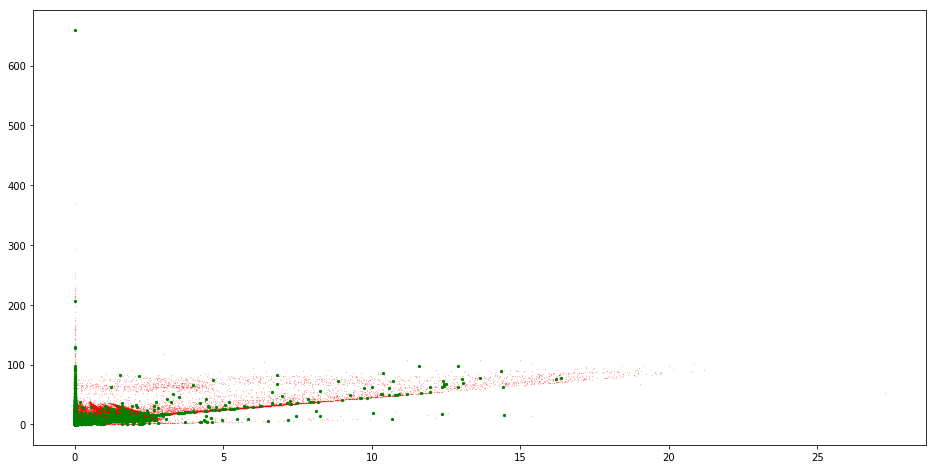

In [55]:
indices1 = train_y.reset_index(drop='index')[train_y.reset_index(drop='index')==1].index
indices0 = train_y.reset_index(drop='index')[train_y.reset_index(drop='index')==0].index

plt.figure(figsize=(16, 8))
plt.scatter(latent[indices0, 0], latent[indices0, 1], c='red', s=0.01)
plt.scatter(latent[indices1, 0], latent[indices1, 1], c='green', s=5);

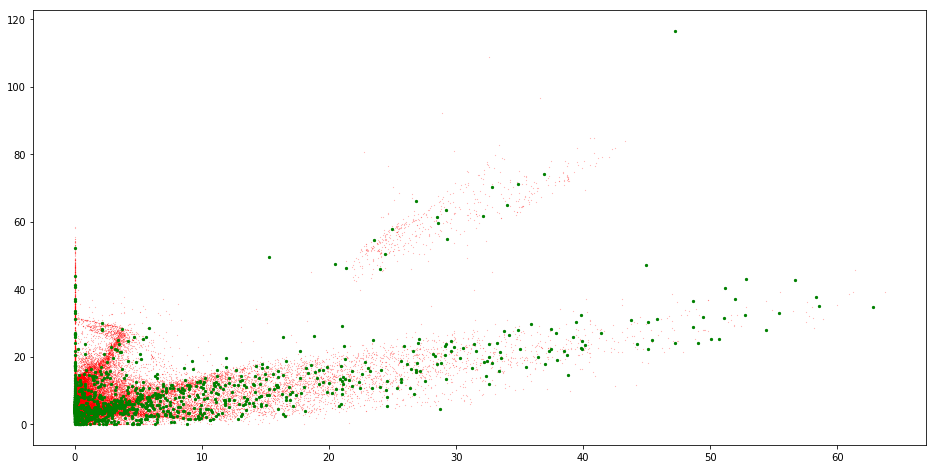

In [13]:
indices1 = test_y.reset_index(drop='index')[test_y.reset_index(drop='index')==1].index
indices0 = test_y.reset_index(drop='index')[test_y.reset_index(drop='index')==0].index

plt.figure(figsize=(16, 8))
plt.scatter(latent_test[indices0, 0], latent_test[indices0, 1], c='red', s=0.01)
plt.scatter(latent_test[indices1, 0], latent_test[indices1, 1], c='green', s=5);

## Implementation by Keras

In [19]:
from keras import backend as K
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Lambda
from keras.losses import mse
from keras.optimizers import Adam
import pandas as pd

#import tensorflow as tf
from keras.layers import Activation

from keras.losses import categorical_crossentropy
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [8]:
%%time
df = pd.read_pickle('../Datasets/TransformedData.pkl')

d = df.iloc[:, 1:].values.var(axis=0)
d = pd.Series(data = d, index = df.iloc[:, 1:].columns)
columns = d[d > 0.01].index

X_train, X_test, y_train, y_test = train_test_split(df[columns].drop(['target'], axis=1), df.target, random_state=0)

scaler = StandardScaler()
train_x = scaler.fit_transform(X_train)
test_x = scaler.transform(X_test)
test_y = y_test
train_y = y_train

CPU times: user 5.97 s, sys: 3 s, total: 8.96 s
Wall time: 8.96 s


In [9]:
onehot = OneHotEncoder()
train_y_onehot = onehot.fit_transform(train_y.values.reshape(-1, 1))
test_y_onehot = onehot.fit_transform(test_y.values.reshape(-1, 1))

In [10]:
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

def vae_loss(y_true, y_pred):
    reconstruction_loss = mse(inputs, vae_output)
    rebuilt_reconstruction_loss = reconstruction_loss * original_dim

    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis = -1)
    kl_loss *= -0.5
    vae_loss = K.mean(kl_loss + rebuilt_reconstruction_loss)
    return vae_loss

original_dim = train_x.shape[1]
batch_size = 32
input_shape = (original_dim, )
latent_dim = 20
epochs = 20

In [11]:
K.clear_session()
# encoder
inputs = Input(shape=input_shape, name="encoder_input")

x = Dense(30, activation="relu")(inputs)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

encoder = Model(inputs, [z_mean, z_log_var, z])
encoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 149)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           4500        encoder_input[0][0]              
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 20)           620         dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 20)           620         dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

In [14]:
# classifier
classifier_hidden_num = 2
classifier_input = Input(shape=(latent_dim,), name = "classifier_input")

x = Dense(classifier_hidden_num, activation="relu")(classifier_input)
x = Dense(classifier_hidden_num*2, activation="relu")(x)
x = Dense(2)(x)
classifier_output = Activation(tf.nn.softmax, name="classifier")(x)

classifier = Model(classifier_input, classifier_output)
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
classifier_input (InputLayer (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 42        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 10        
_________________________________________________________________
classifier (Activation)      (None, 2)                 0         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [15]:
# decoder
latent_inputs = Input(shape=(latent_dim,))
x = Dense(30, activation="relu")(latent_inputs)
vae_output = Dense(original_dim, activation="sigmoid", name="vae")(x)

decoder = Model(latent_inputs, vae_output)
decoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 30)                630       
_________________________________________________________________
vae (Dense)                  (None, 149)               4619      
Total params: 5,249
Trainable params: 5,249
Non-trainable params: 0
_________________________________________________________________


In [16]:
classifier_output = classifier(encoder(inputs)[0])
vae_output = decoder(encoder(inputs)[2])

vae_classifier = Model(inputs, [classifier_output, vae_output])
vae_classifier.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 149)          0                                            
__________________________________________________________________________________________________
model_1 (Model)                 [(None, 20), (None,  5740        encoder_input[0][0]              
                                                                 encoder_input[0][0]              
__________________________________________________________________________________________________
model_2 (Model)                 (None, 2)            64          model_1[1][0]                    
__________________________________________________________________________________________________
model_3 (Model)                 (None, 149)          5249        model_1[2][2]                    
Total para

In [17]:
def binary_PFA(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    # N = total number of negative labels
    N = K.sum(1 - y_true)
    # FP = total number of false alerts, alerts from the negative class labels
    FP = K.sum(y_pred - y_pred * y_true)    
    return FP/N
#-----------------------------------------------------------------------------------------------------------------------------------------------------
# P_TA prob true alerts for binary classifier
def binary_PTA(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    # P = total number of positive labels
    P = K.sum(y_true)
    # TP = total number of correct alerts, alerts from the positive class labels
    TP = K.sum(y_pred * y_true)    
    return TP/P

def binary_precision(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    predicted_P = K.sum(y_pred)
    # TP = total number of correct alerts, alerts from the positive class labels
    TP = K.sum(y_pred * y_true)    
    return TP/(predicted_P + 0.00001)

def auc(y_true, y_pred):   
    ptas = tf.stack([binary_PTA(y_true,y_pred,k) for k in np.linspace(0, 1, 1000)],axis=0)
    pfas = tf.stack([binary_PFA(y_true,y_pred,k) for k in np.linspace(0, 1, 1000)],axis=0)
    pfas = tf.concat([tf.ones((1,)) , pfas],axis=0)
    binSizes = -(pfas[1:]-pfas[:-1])
    s = ptas*binSizes
    return K.sum(s, axis=0)

def pr_auc(y_true, y_pred):
    ptas = tf.stack([binary_precision(y_true,y_pred,k) for k in np.linspace(0, 1, 200)],axis=0)
    pfas = tf.stack([binary_PTA(y_true,y_pred,k) for k in np.linspace(0, 1, 200)],axis=0)
    #pfas = tf.concat([tf.ones((1,)) ,pfas],axis=0)
    binSizes = -(pfas[1:]-pfas[:-1])
    s = ptas[:-1]*binSizes
    return K.sum(s, axis=0)    

In [20]:
opt = Adam(lr=0.001)
# here the loss weights are 1:1, which means that there is no penalty for misclassification
# the total loss =  1* vae_loss + 1* classification_loss
vae_classifier.compile(optimizer=opt, loss={"model_2":"categorical_crossentropy", "model_3":vae_loss},
                       metrics={'model_2': [pr_auc]},
                      loss_weights = {"model_2":1, "model_3":2})
vae_classifier.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 149)          0                                            
__________________________________________________________________________________________________
model_1 (Model)                 [(None, 20), (None,  5740        encoder_input[0][0]              
                                                                 encoder_input[0][0]              
__________________________________________________________________________________________________
model_2 (Model)                 (None, 2)            64          model_1[1][0]                    
__________________________________________________________________________________________________
model_3 (Model)                 (None, 149)          5249        model_1[2][2]                    
Total para

In [21]:
N = 1000000
k = 1000
batch_size=512
history = vae_classifier.fit(train_x[:N], {'model_2': train_y_onehot[:N].todense(), 'model_3': train_x[:N]}, epochs=3, batch_size=batch_size, 
            #validation_data = [test_x[:k], {'model_2': test_y_onehot[:k].todense(), 'model_3': test_x[:k]}]
            )

Epoch 1/3
226089/226089 [==============================] - 11s 49us/step - loss: 310.3057 - model_2_loss: 0.2931 - model_3_loss: 155.0063 - model_2_pr_auc: 0.9585
Epoch 2/3
226089/226089 [==============================] - 9s 39us/step - loss: 282.3485 - model_2_loss: 0.1168 - model_3_loss: 141.1159 - model_2_pr_auc: 0.9855
Epoch 3/3
226089/226089 [==============================] - 9s 39us/step - loss: 273.1021 - model_2_loss: 0.0974 - model_3_loss: 136.5024 - model_2_pr_auc: 0.9849


In [62]:
# loss = history.history["loss"]
# val_loss = history.history["val_loss"]

KeyError: 'val_loss'

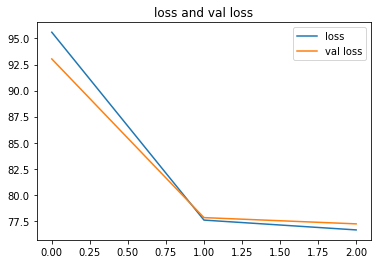

In [81]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.title("loss and val loss")
# plt.plot(loss, label = "loss")
# plt.plot(val_loss, label = "val loss")
# plt.legend()

In [22]:
def vae_z_2dplot(x_data, y_data, encoder):
    _, _, z = encoder.predict(x_data)
    plt.figure(figsize=(15,15))
    plt.title("latent space plot")
    plt.xlabel("z_one")
    plt.ylabel("y_two")
    plt.scatter(z[:,0], z[:,1], c = y_data, alpha = 0.5, s = 10)
    plt.colorbar()

In [23]:
def vae_zmean_2dplot(x_data, y_data, encoder):
    z_mean, _, _ = encoder.predict(x_data)
    plt.figure(figsize=(15,15))
    plt.title("latent space plot")
    plt.xlabel("z_one")
    plt.ylabel("y_two")
    plt.scatter(z_mean[:,0], z_mean[:,1], c = y_data, alpha = 0.5, s = 10)
    plt.colorbar()

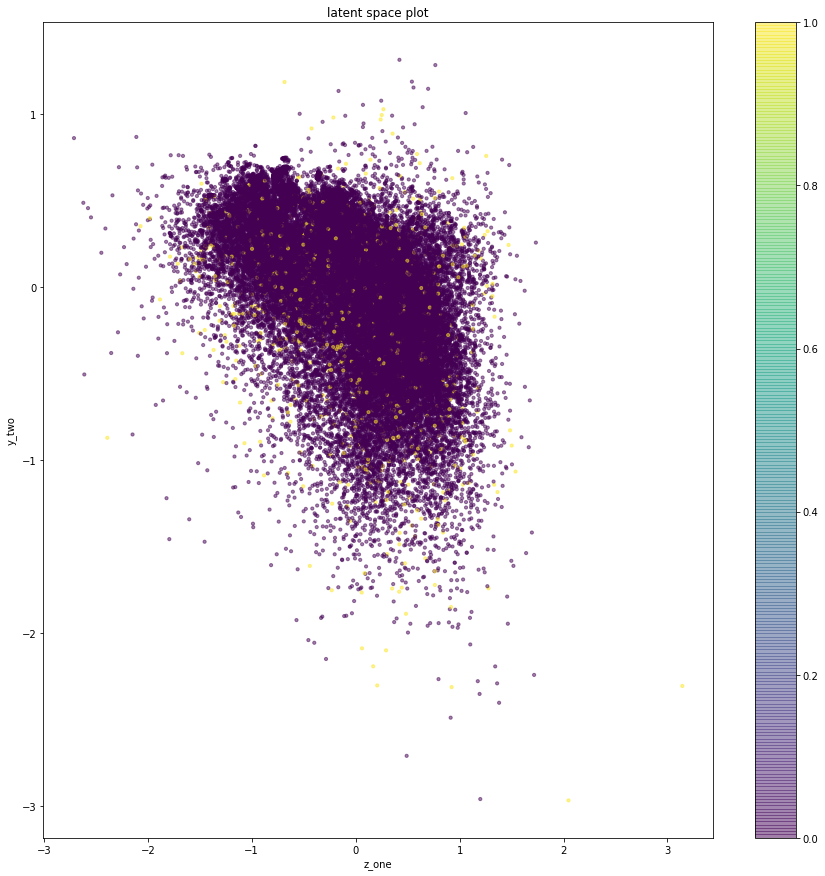

In [24]:
vae_zmean_2dplot(test_x, test_y, encoder)

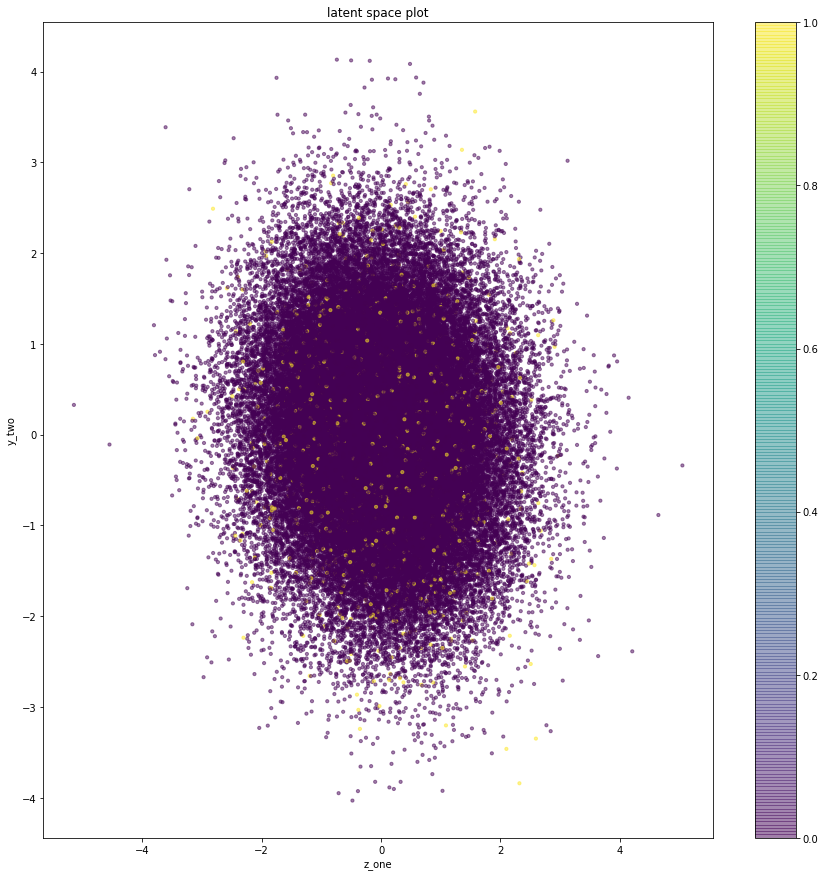

In [25]:
vae_z_2dplot(test_x, test_y, encoder)

In [30]:
## import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split

from lightgbm import LGBMClassifier
from time import time

In [31]:
def plot_confusion_matrix(prediction, y_test):
    plt.figure(figsize=(15, 6))
    c_matrix = confusion_matrix(y_test, prediction)
    c_matrix_ = np.round(100 * c_matrix / c_matrix.sum(axis=1).reshape(-1, 1))
    plt.subplot(121)
    sns.heatmap(c_matrix, annot=True, fmt="d");
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.subplot(122)
    sns.heatmap(np.asarray(c_matrix_, dtype=int), annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def get_roc_auc_score(prediction, y_test):
    value = np.round(roc_auc_score(y_test, prediction[:,1]),4)
    print('ROC AUC score:',  value)
    
    return value

def get_pr_auc_score(prediction, y_test):
    value = np.round(average_precision_score(y_test, prediction[:, 1]),4)
    print('PR AUC score:',  value)
    
    return value
    
def plot_curves(prediction, y_test):
    tpr, fpr, _ = roc_curve(y_test, prediction[:,1])
    roc_auc = roc_auc_score(y_test, prediction[:,1])
    
    precision, recall, _ = precision_recall_curve(y_test, prediction[:,1])
    average_precision = average_precision_score(y_test, prediction[:,1])

    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.step(tpr, fpr, color='b', alpha=0.2, where='post')
    plt.fill_between(tpr, fpr, step='post', alpha=0.2, color='b')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class ROC curve: ROC AUC={0:0.2f}'.format(roc_auc))

    plt.subplot(122)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    
def get_threshold_by_f1(prediction_proba, y_test, plot=False):
    thresholds = np.linspace(prediction_proba[:, 1].min(), prediction_proba[:, 1].max(), 300)
    curve = []
    for val in thresholds:
       
        prediction = np.asarray((prediction_proba[:, 1] >= val), int)
        curve.append(f1_score(prediction, y_test))

    argmax = np.argmax(curve)

    if plot == True:
        plt.figure(figsize=(14, 4))
        plt.plot(thresholds, curve)
        plt.title('F1 curve', fontsize=16)
        plt.plot([thresholds[argmax]] * 2, [np.min(curve), np.max(curve)])
    
    return thresholds[argmax]

def plot_probas(prediction_proba, y_test):
    plt.figure(figsize=(14, 4))
    probas = prediction_proba[:, 1]
    ax = sns.distplot(probas)
    proba_mean = probas.mean()
    proba_f1_best = get_threshold_by_f1(prediction_proba, y_test)
    plt.plot([proba_mean] * 2, ax.get_ylim(), label='Mean of probabilites')
    plt.plot([proba_f1_best] * 2, ax.get_ylim(), label='Best threshold by f1 score')
    plt.legend(fontsize=16)

In [32]:
data = encoder.predict(train_x)[0]
data_test = encoder.predict(test_x)[0]

In [33]:
%%time
m1 = LGBMClassifier()
m1.fit(np.c_[train_x, data], train_y.values)

CPU times: user 34.7 s, sys: 239 ms, total: 34.9 s
Wall time: 2.87 s


In [34]:
%%time
m2 = LGBMClassifier()
m2.fit(data, train_y.values)

CPU times: user 11.9 s, sys: 17.4 ms, total: 11.9 s
Wall time: 629 ms


In [35]:
%%time
m3 = LGBMClassifier()
m3.fit(train_x, train_y.values)

CPU times: user 30.6 s, sys: 110 ms, total: 30.7 s
Wall time: 2.49 s


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ROC AUC score: 0.832
PR AUC score: 0.0925
CPU times: user 8.74 s, sys: 5.18 s, total: 13.9 s
Wall time: 6.15 s


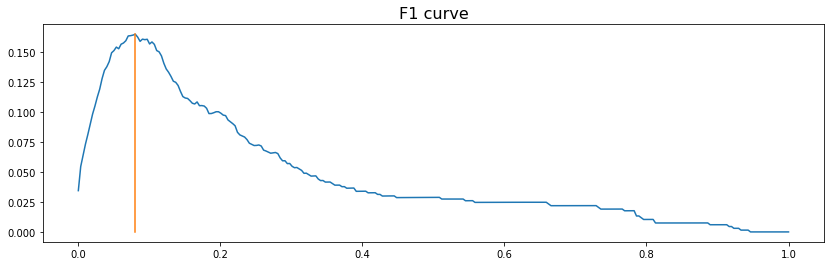

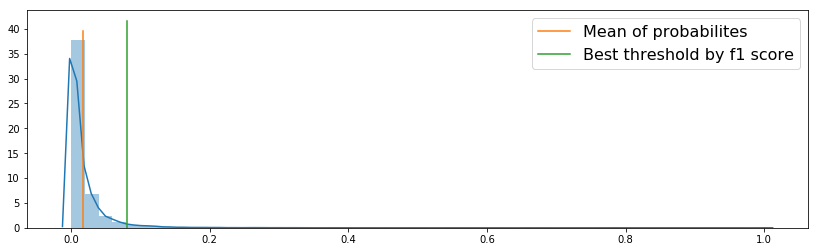

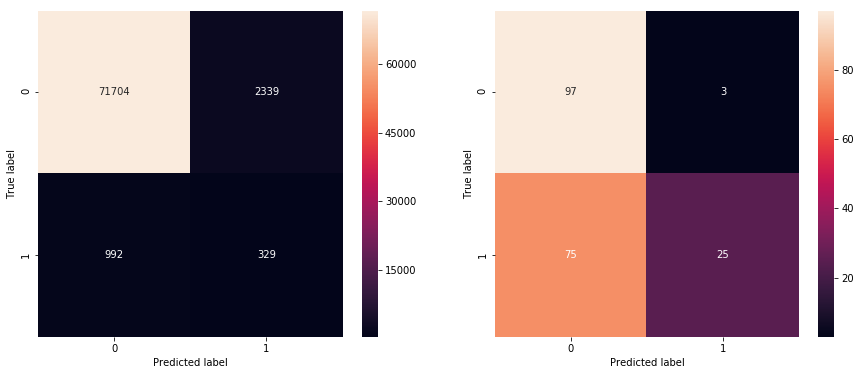

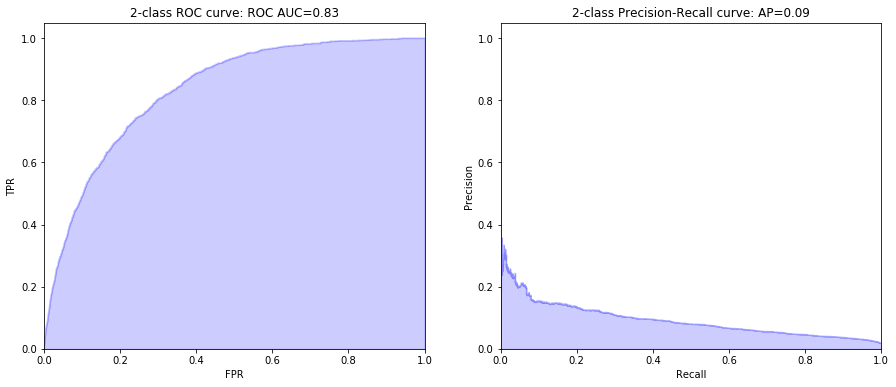

In [36]:
%%time 

prediction_proba = m1.predict_proba(np.c_[test_x, data_test])
prediction = prediction_proba[:, 1] > get_threshold_by_f1(prediction_proba, y_test, plot=True)
plot_probas(prediction_proba, y_test)

get_roc_auc_score(prediction_proba, y_test)
get_pr_auc_score(prediction_proba, y_test)

plot_confusion_matrix(prediction, y_test)
plot_curves(prediction_proba, y_test)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ROC AUC score: 0.7592
PR AUC score: 0.0573
CPU times: user 8.16 s, sys: 5.19 s, total: 13.3 s
Wall time: 5.98 s


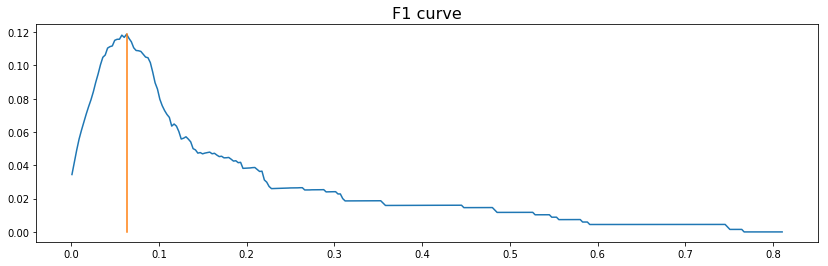

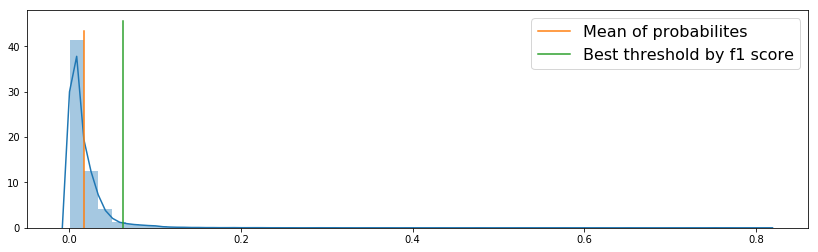

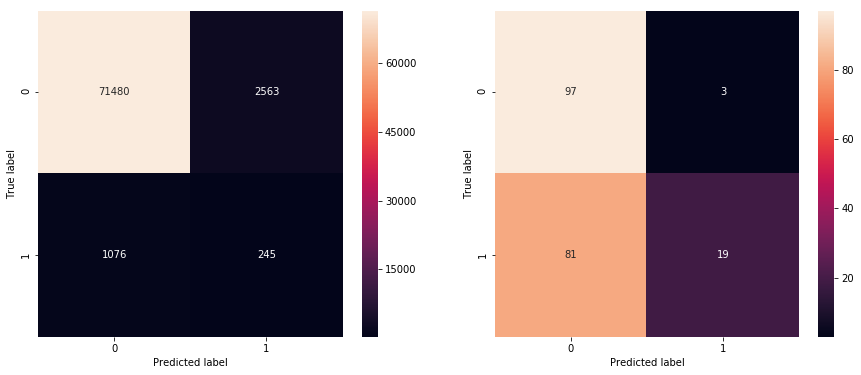

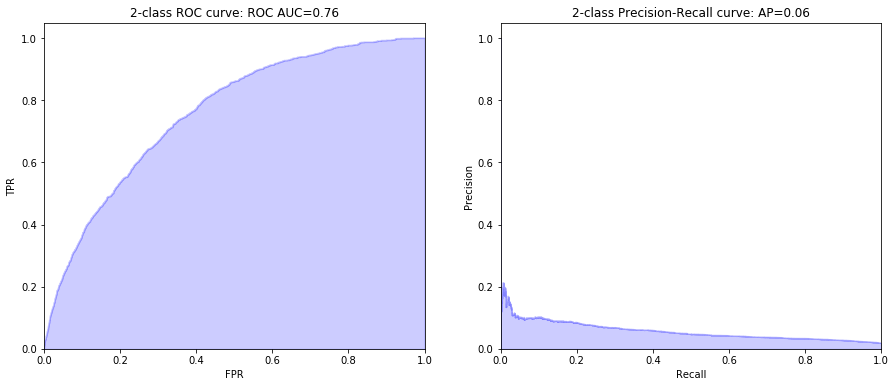

In [37]:
%%time 

prediction_proba = m2.predict_proba(data_test)
prediction = prediction_proba[:, 1] > get_threshold_by_f1(prediction_proba, y_test, plot=True)
plot_probas(prediction_proba, y_test)

get_roc_auc_score(prediction_proba, y_test)
get_pr_auc_score(prediction_proba, y_test)

plot_confusion_matrix(prediction, y_test)
plot_curves(prediction_proba, y_test)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ROC AUC score: 0.8367
PR AUC score: 0.0967
CPU times: user 8.56 s, sys: 5.24 s, total: 13.8 s
Wall time: 6.08 s


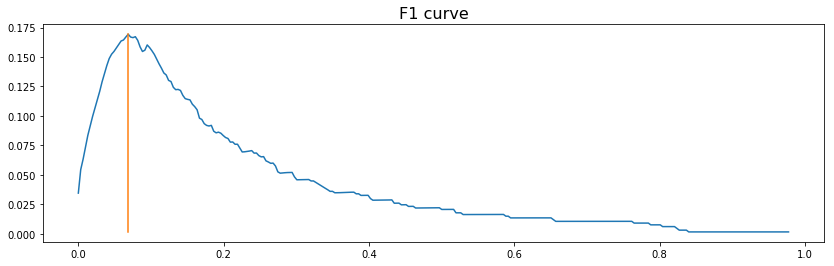

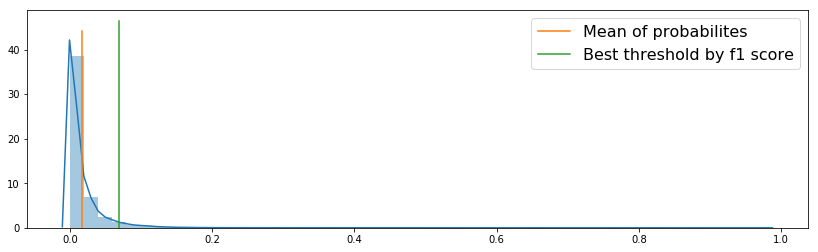

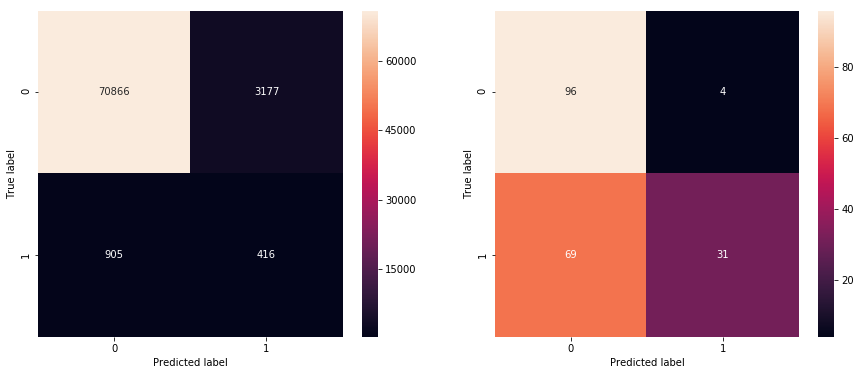

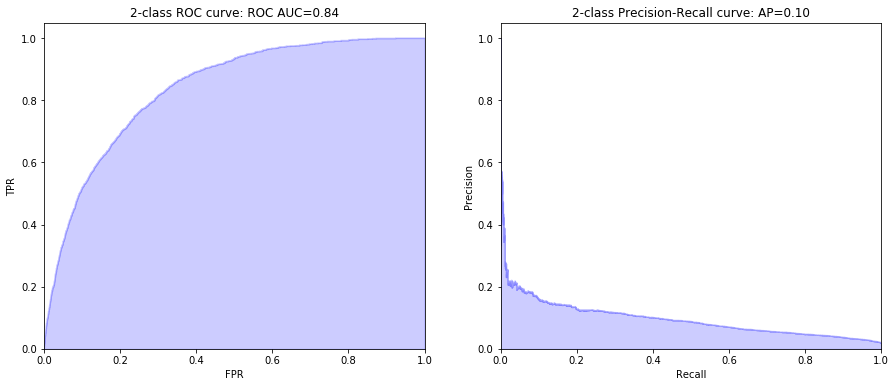

In [38]:
%%time 

prediction_proba = m3.predict_proba(test_x)
prediction = prediction_proba[:, 1] > get_threshold_by_f1(prediction_proba, y_test, plot=True)
plot_probas(prediction_proba, y_test)

get_roc_auc_score(prediction_proba, y_test)
get_pr_auc_score(prediction_proba, y_test)

plot_confusion_matrix(prediction, y_test)
plot_curves(prediction_proba, y_test)